# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Sinta Siti Nuriah
- **Email:** sinta@sttcipasung.ac.id
- **ID Dicoding:** sintastnrh

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi pelanggan berdasarkan lokasi?
2. Apa metode pembayaran yang paling sering digunakan dan bagaimana distribusi total pembayarannya?
3. Kategori produk mana yang memiliki harga rata-rata tertinggi dan terendah serta berkontribusi paling besar terhadap pendapatan?
4. Bagaimana distribusi dan rata-rata skor review pelanggan? Apakah kategori produk tertentu cenderung memiliki skor review tinggi atau rendah?
5. Bagaimana status pengiriman pesanan? Berapa persen pesanan yang mengalami pembatalan pesanan?
6. Apakah terdapat pola musiman atau tren tertentu dalam jumlah pesanan bulanan, dan bagaimana kinerja bulan-bulan tertentu dibandingkan dengan rata-rata?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from os import path
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display
from folium import Figure
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [ ]:
drive.mount('/content/drive')
path_global = './drive/MyDrive/Laskar AI/01-Belajar Analisis Data dengan Python/Submission/Data/E-Commerce Public Dataset'

df_customer = pd.read_csv(path_global + '/customers_dataset.csv')
df_geolocation = pd.read_csv(path_global + '/geolocation_dataset.csv')
df_items = pd.read_csv(path_global + '/order_items_dataset.csv')
df_payments = pd.read_csv(path_global + '/order_payments_dataset.csv')
df_reviews = pd.read_csv(path_global + '/order_reviews_dataset.csv')
df_orders = pd.read_csv(path_global + '/orders_dataset.csv')
df_products = pd.read_csv(path_global + '/products_dataset.csv')
df_sellers = pd.read_csv(path_global + '/sellers_dataset.csv')
df_translation = pd.read_csv(path_global + '/product_category_name_translation.csv')

Mounted at /content/drive


**Menampilkan sebagian data df_customer**

In [ ]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Menampilkan sebagian data df_geolocation**

In [ ]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Menampilkan sebagian data df_items**

In [ ]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Menampilkan sebagian data df_payments**

In [ ]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Menampilkan sebagian data df_reviews**

In [ ]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Menampilkan sebagian data df_orders**

In [ ]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Menampilkan sebagian data df_products**

In [ ]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Menampilkan sebagian data df_sellers**

In [ ]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Menampilkan sebagian data df_translation**

In [ ]:
df_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- df_customer menjelaskan terkait lokasi keberadaan pelanggan seperti kota dan negara bagian.
- df_geolocation menjelaskan tentang titik koordinat pada suatu kota dan negara bagian.
- df_item menjelaskan tentang harga item dan biaya pengiriman pada item tersebut.
- df_payments menjelaskan terkait metode pembayaran, biaya angsuran serta jumlah pembayaran.
- df_reviews menjelaskan terkait penilaian pada pembelian barang.
- df_orders menjelaskan terkait proses pengiriman barang dari penjual ke pelanggan.
- df_products menjelaskan tentang detail pada suatu produk tertentu.
- df_sellers menjelaskan terkait lokasi keberadaan seller seperti kota dan negara bagian.
- df_translation menjelaskan terkait nama kategori berdasarkan daerah asal dam bahasa inggris.

### Assessing Data

In [ ]:
# Penilaian pada dataset customer
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Melakukan pemeriksaan nilai null pada dataset customer
print(df_customer.isnull().sum())

# Menghitung jumlah duplikasi pada dataset customer
print('Jumlah duplikasi dataset customer: ', df_customer.duplicated().sum())

# Melihat detail terkait dataset customer
df_customer.describe()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah duplikasi dataset customer:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
# Penilaian pada dataset geolocation
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
# Melakukan pemeriksaan nilai null pada dataset geolocation
print(df_geolocation.isnull().sum())

# Menghitung jumlah duplikasi pada dataset geolocation
print('Jumlah duplikasi dataset geolocation: ', df_geolocation.duplicated().sum())

# Melihat detail terkait dataset geolocation
df_geolocation.describe()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Jumlah duplikasi dataset geolocation:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
# Penilaian pada dataset items
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Melakukan pemeriksaan nilai null pada dataset items
print(df_items.isnull().sum())

# Menghitung jumlah duplikasi pada dataset items
print('Jumlah duplikasi dataset items: ', df_items.duplicated().sum())

# Melihat detail terkait dataset items
df_items.describe()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah duplikasi dataset items:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
# Penilaian pada dataset payments
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# Melakukan pemeriksaan nilai null pada dataset payments
print(df_payments.isnull().sum())

# Menghitung jumlah duplikasi pada dataset payments
print('Jumlah duplikasi dataset payments: ', df_payments.duplicated().sum())

# Melihat detail terkait dataset payments
df_payments.describe()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Jumlah duplikasi dataset payments:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
# Penilaian pada dataset reviews
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Melakukan pemeriksaan nilai null pada dataset reviews
print(df_reviews.isnull().sum())

# Menghitung jumlah duplikasi pada dataset reviews
print('Jumlah duplikasi dataset reviews: ', df_reviews.duplicated().sum())

# Melihat detail terkait dataset reviews
df_reviews.describe()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Jumlah duplikasi dataset reviews:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Penilaian pada dataset orders
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Melakukan pemeriksaan nilai null pada dataset orders
print(df_orders.isnull().sum())

# Menghitung jumlah duplikasi pada dataset orders
print('Jumlah duplikasi dataset orders: ', df_orders.duplicated().sum())

# Melihat detail terkait dataset orders
df_orders.describe()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Jumlah duplikasi dataset orders:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
# Penilaian pada dataset products
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Melakukan pemeriksaan nilai null pada dataset products
print(df_products.isnull().sum())

# Menghitung jumlah duplikasi pada dataset products
print('Jumlah duplikasi dataset products: ', df_products.duplicated().sum())

# Melihat detail terkait dataset products
df_products.describe()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Jumlah duplikasi dataset products:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
# Penilaian pada dataset sellers
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Melakukan pemeriksaan nilai null pada dataset sellers
print(df_sellers.isnull().sum())

# Menghitung jumlah duplikasi pada dataset sellers
print('Jumlah duplikasi dataset sellers: ', df_sellers.duplicated().sum())

# Melihat detail terkait dataset sellers
df_sellers.describe()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Jumlah duplikasi dataset sellers:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
# Penilaian pada dataset translation
df_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
# Melakukan pemeriksaan nilai null pada dataset translation
print(df_translation.isnull().sum())

# Menghitung jumlah duplikasi pada dataset translation
print('Jumlah duplikasi dataset translation: ', df_translation.duplicated().sum())

# Melihat detail terkait dataset translation
df_translation.describe()

product_category_name            0
product_category_name_english    0
dtype: int64
Jumlah duplikasi dataset translation:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- df_geolocation memiliki nilai duplikasi sebanyak 261831
- df_reviews memiliki nilai null pada kolom review_comment_title sebanyak 87656
dan review_comment_message sebanyak 58247
- df_orders memiliki nilai null pada kolom-kolom berikut:
  - order_approved_at = 160
  - order_delivered_carrier_date = 1783
  - order_delivered_customer_date = 2965
- df_products memiliki nilai null pada kolom-kolom berikut:
  - product_category_name = 610
  - product_name_lenght = 610
  - product_description_lenght = 610
  - product_photos_qty = 610
  - product_weight_g = 2
  - product_length_cm = 2
  - product_height_cm = 2
  - product_width_cm = 2
- dan untuk df_customer, df_translation, df_items, df_payments, df_sellers tidak memiliki nilai null dan duplikat

### Cleaning Data

In [ ]:
# Menghapus duplikasi data pada df_geolocation
print('Jumlah duplikasi dataset geolocation sebelumnya: ', df_geolocation.duplicated().sum())
df_geolocation.drop_duplicates(inplace=True)
print('Jumlah duplikasi dataset geolocation setelah dihapus: ', df_geolocation.duplicated().sum())


Jumlah duplikasi dataset geolocation sebelumnya:  261831
Jumlah duplikasi dataset geolocation setelah dihapus:  0


**Mengganti type data menjadi datetime pada df_items, df_orders, dan df_re=ivews**

In [ ]:
# Mengganti tipe data menjadi datetime pada df_items
df_items['shipping_limit_date'] = pd.to_datetime(df_items['shipping_limit_date'])

# Memastikan bahwa type data pada kolom tersebut berubah
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# Mengganti type data menjadi datetime pada df_reviews
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])
df_reviews['review_answer_timestamp'] = pd.to_datetime(df_reviews['review_answer_timestamp'])

# Memastikan bahwa type data pada kolom tersebut berubah
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
# Mengganti type data menjadi datetime pada df_orders
df_orders = pd.read_csv(path_global + '/orders_dataset.csv')

df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

# Memastikan bahwa tipe data telah berubah
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Mengisi missing value pada df_reviews, df_orders dan df_products**

In [ ]:
# Mengisi missing value dengan nilai default "No title" dan "No message"
df_reviews['review_comment_title'].fillna('No title', inplace=True)
df_reviews['review_comment_message'].fillna('No message', inplace=True)

# Memastikan perubahan sudah berhasil
df_reviews.head()

<ipython-input-34-09bdeceb79bf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reviews['review_comment_title'].fillna('No title', inplace=True)
<ipython-input-34-09bdeceb79bf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No title,No message,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No title,No message,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No title,No message,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [ ]:
# Memastikan bahwa tidak ada nilai null pada df_reviews
df_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [ ]:
# Mengisi missing value dengan "Others" kolom product_category_name
df_products['product_category_name'].fillna('Others', inplace=True)

# Mengisi kolom dengan nilai median
numeric_columns = df_products.select_dtypes(include=[np.number]) # Memilih kolom numerik
df_products[numeric_columns.columns] = df_products[numeric_columns.columns].fillna(numeric_columns.median())

# memastikan bahwa tidak ada nilai null pada df_products
print(df_products.isna().sum())

# Memastikan perubahan sudah berhasil
df_products.head()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


<ipython-input-36-89879f9a9bfe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_category_name'].fillna('Others', inplace=True)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Mengisi missing value pada df_orders dengan metode ffill()
df_orders.fillna(method='ffill', inplace=True)

# Memastikan bahwa tidak ada nilai null pada df_orders
df_orders.isna().sum()

<ipython-input-37-002965343808>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_orders.fillna(method='ffill', inplace=True)


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Insight:**
- Semua dataset yang memiliki missing value dan duplikasi data telah dibersihkan

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Mengetahui nilai unik pada df_customers
df_customer['customer_id'].is_unique

True

In [ ]:
# Mengetahui kota pelanggan yang paling dominan
df_customer.groupby('customer_city')['customer_id'].count().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
# Melihat data geolocation kota pelanggan terbanyak
df_geolocation['geolocation_city'].value_counts().sort_values(ascending=False)

,count
geolocation_city,
sao paulo,79927
rio de janeiro,35177
são paulo,19718
belo horizonte,19474
curitiba,11263
...,...
carabuçu,1
sao vicente do grama,1
tres aliancas,1


In [ ]:
# Melihat data geolocation negara bagian pelanggan terbanyak
df_geolocation['geolocation_state'].value_counts().sort_values(ascending=False)

,count
geolocation_state,
SP,285976
MG,101353
RJ,78836
RS,48093
PR,45059
SC,30191
BA,27720
GO,15601
PE,13162


In [ ]:
# Melihat jenis pembayaran paling banyak
df_payments.groupby('payment_type')['order_id'].size().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [ ]:
# Melihat payment value tertinggi
df_payments.groupby('payment_value')['order_id'].size().sort_values(ascending=False)

,order_id
payment_value,
50.00,324
20.00,274
100.00,255
77.57,250
35.00,165
...,...
222.87,1
222.89,1
222.91,1


In [ ]:
# Melihat total payment value tertinggi berdasarkan metode pembayaran
df_payments.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

,payment_value
payment_type,
credit_card,12542084.19
boleto,2869361.27
voucher,379436.87
debit_card,217989.79
not_defined,0.00


In [ ]:
# Melihat Item apa yang memiliki harga pengiriman paling tinggi dan paling rendah
df_items.groupby('freight_value')['order_id'].size().sort_values(ascending=True)

,order_id
freight_value,
409.68,1
63.19,1
63.22,1
63.25,1
63.26,1
...,...
18.23,1575
11.85,1846
14.10,1875


In [ ]:
# Melihat item dengan harga paling tinggi
df_items.groupby(by='price')['order_id'].size().sort_values(ascending=True)

,order_id
price,
6735.00,1
78.76,1
78.85,1
304.91,1
78.93,1
...,...
99.90,1432
89.90,1548
49.90,1953


In [ ]:
# Melihat nilai review score terbanyak
df_reviews.groupby('review_score')['review_id'].size().sort_values(ascending=False)

,review_id
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


In [ ]:
# Melihat nilai rata-rata review score
df_reviews['review_score'].mean()

4.08642062404257

In [ ]:
# Melihat jumlah data order yang selesai
df_orders.groupby('order_status')['order_id'].size().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
# Melihat data kategori produk paling diminati
df_products.groupby('product_category_name')['product_id'].size().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [ ]:
# Melihat data kota seller terbanyak
df_sellers.groupby('seller_city')['seller_id'].size().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [ ]:
# Melihat data negara bagian dengan seller terbanyak
df_sellers.groupby('seller_state')['seller_id'].size().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


**Insight:**
- df_customer kota pelanggan yang paling dominan adalah Sao Paulo
- df_geolocation untuk kota terbanyak pelanggan berasal dari Sao Paulo dan Negara bagian terbanyak pelanggan dengan kode SP
- df_payments jenis pembayaran paling banyak adalah credit card, total pembayaran tertinggi sesuai metode pembayaran adalah sebesar 12542084.19 untuk credit card dan payment value tertinggi berdasarkan order_id adalah 50.00 dengan order id sebanyak 324.
- df_items dengan harga tertinggi senilai 6735.00 dan biaya pengiriman tertinggi seniali 409.68
- df_reviews terbanyak adalah 5 dengan rata-rata review score dari keseluruhan adalah 4.086
- df_order yang telah selesai dan diterima oleh pelanggan sekitar 96478
- df_product dengan kategori produk yang banyak diminati adalah cama_mesa_banho.
- df_sellers kota terbanyak adalah sao paulo dan seller berasal dari negara bagian terbanyak dengan kode SP

# Penggabungan seluruh dataset yang ada

In [ ]:
# Gabungkan customers dengan orders
df = df_orders.merge(df_customer, on='customer_id', how='left')

In [ ]:
# Gabungkan dengan order_items
df = df.merge(df_items, on='order_id', how='left')

In [ ]:
# Gabungkan dengan payments
df = df.merge(df_payments, on='order_id', how='left')

In [ ]:
# Gabungkan dengan reviews
df = df.merge(df_reviews, on='order_id', how='left')

In [ ]:
# Gabungkan dengan products
df = df.merge(df_products, on='product_id', how='left')

In [ ]:
# Gabungkan dengan category translation
df = df.merge(df_translation, on='product_category_name', how='left')

In [ ]:
# Gabungkan dengan sellers
df = df.merge(df_sellers, on='seller_id', how='left')

In [ ]:
# Gabungkan dengan geolocation (berdasarkan kode pos)
df_geolocation_unique = df_geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])
df = df.merge(df_geolocation_unique, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [ ]:
# Tampilkan hasil akhir
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,9350.0,-23.680114,-46.452454,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,9350.0,-23.680114,-46.452454,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,9350.0,-23.680114,-46.452454,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,perfumery,31570.0,belo horizonte,SP,31570.0,-19.810119,-43.984727,belo horizonte,MG
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,auto,14840.0,guariba,SP,14840.0,-21.362358,-48.232976,guariba,SP


In [ ]:
df.groupby(by=['customer_state', 'product_category_name_english']).agg({
    'price' : 'sum',
}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

In [ ]:
df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(by='review_score', ascending=False)

,review_score,customer_id
4,5.0,66343
3,4.0,22319
2,3.0,9894
1,2.0,4162
0,1.0,15428


In [ ]:
#RFM
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              119143 non-null  datetime64[ns]
 5   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 6   order_delivered_customer_date  119143 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   customer_unique_id             119143 non-null  object        
 9   customer_zip_code_prefix       119143 non-null  int64         
 10  customer_city                  119143 non-null  object        
 11  

In [ ]:
# Melihat tanggal transaksi terakhir pada dataset
reference_date = df['order_purchase_timestamp'].max()
print("Reference Date:", reference_date)

Reference Date: 2018-10-17 17:30:18


In [ ]:
rfm_df = df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency: Selisih dengan transaksi terakhir
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()


In [ ]:
rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
}, inplace=True)


In [ ]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,99441.000000,99441.000000,99441.000000
mean,289.900192,1.198128,206.953510
std,153.667316,0.751055,622.550183
min,0.000000,1.000000,0.000000
25%,166.000000,1.000000,62.960000
50%,271.000000,1.000000,110.240000
75%,400.000000,1.000000,196.520000
max,772.000000,63.000000,109312.640000


In [ ]:
# Fungsi untuk membagi nilai RFM menjadi 4 kelompok (1=terburuk, 4=terbaik)
def rfm_score(x, quantiles, col_name):
    if x <= quantiles[col_name][0.25]:
        return 1
    elif x <= quantiles[col_name][0.50]:
        return 2
    elif x <= quantiles[col_name][0.75]:
        return 3
    else:
        return 4

# Memastikan 'Recency', 'Frequency', and 'Monetary' adalah numeric
rfm_df['Recency'] = pd.to_numeric(rfm_df['Recency'])
rfm_df['Frequency'] = pd.to_numeric(rfm_df['Frequency'])
rfm_df['Monetary'] = pd.to_numeric(rfm_df['Monetary'])

# Hitung kuartil dari masing-masing metrik
quantiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.50, 0.75])

# Terapkan fungsi ke dataset RFM
rfm_df['R_Score'] = rfm_df['Recency'].apply(rfm_score, args=(quantiles, 'Recency'))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(rfm_score, args=(quantiles, 'Frequency'))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(rfm_score, args=(quantiles, 'Monetary'))

In [ ]:
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
rfm_df['RFM_Score']

,RFM_Score
0,313
1,412
2,413
3,413
4,212
...,...
99436,242
99437,112
99438,114
99439,442


In [ ]:
def segment_customer(df):
    if df['RFM_Score'] in ['444', '433', '434', '343']:
        return 'Loyal Customer'
    elif df['RFM_Score'] in ['111', '211', '311', '121']:
        return 'Churned Customer'
    elif df['RFM_Score'] in ['331', '332', '321', '421']:
        return 'New Customer'
    elif df['RFM_Score'] in ['412', '422', '423', '432']:
        return 'Potential Loyalist'
    else:
        return 'Regular Customer'

rfm_df['Customer_Segment'] = rfm_df.apply(segment_customer, axis=1)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi pelanggan berdasarkan lokasi?

<ipython-input-73-c93cd98967db>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_count', y='customer_state', data=state_counts, palette='Blues_r', ax=axes[1])


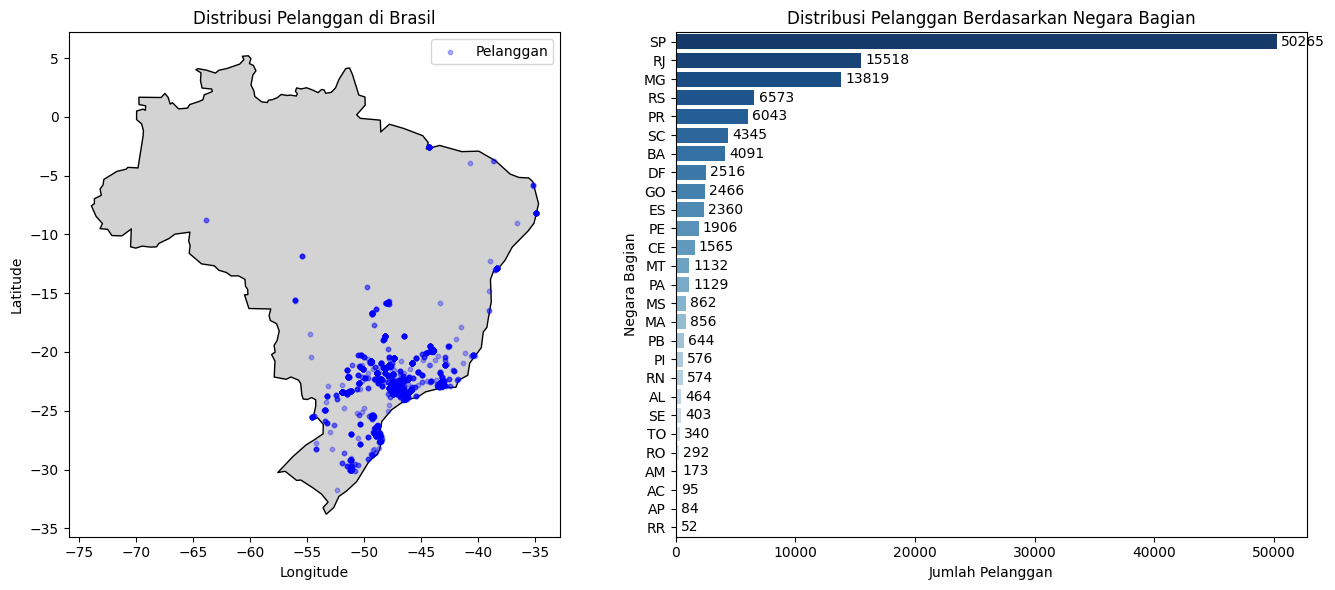

In [ ]:
df_customer_geo = df[['geolocation_lat', 'geolocation_lng']].dropna()
df_sample = df_customer_geo.sample(n=5000, random_state=42) if len(df_customer_geo) > 5000 else df_customer_geo

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'height_ratios': [1]})
axes = axes.flatten()

# Scatter Plot Distribusi Pelanggan
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
gdf_world = gpd.read_file(url)
brazil = gdf_world[gdf_world["ADMIN"] == "Brazil"]

brazil.plot(ax=axes[0], color='lightgray', edgecolor='black')
axes[0].scatter(df_sample['geolocation_lng'], df_sample['geolocation_lat'], alpha=0.3, s=10, color='blue', label="Pelanggan")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].set_title("Distribusi Pelanggan di Brasil")
axes[0].legend()

# Bar Chart Jumlah Pelanggan per Negara Bagian
state_counts = df.groupby('customer_state').size().reset_index(name='customer_count')
state_counts = state_counts.sort_values(by='customer_count', ascending=False)

sns.barplot(x='customer_count', y='customer_state', data=state_counts, palette='Blues_r', ax=axes[1])
axes[1].set_xlabel("Jumlah Pelanggan")
axes[1].set_ylabel("Negara Bagian")
axes[1].set_title("Distribusi Pelanggan Berdasarkan Negara Bagian")

# label angka pada bar chart
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', padding=3)

# Heatmap Distribusi Pelanggan (Ditampilkan di Subplot)
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
HeatMap(df_sample.values, radius=8, blur=10, min_opacity=0.3).add_to(m)
fig_map = Figure(width=600, height=400)
fig_map.add_child(m)
display(fig_map)

plt.tight_layout()
plt.show()


**Insight**
- Terlihat penyebaran pelanggan berdasarkan lokasi, dimana terdapat map distribusi penyebaran pelanggan di Brasil.
- Terlihat distribusi penyebaran berdasarkan negara bagian terbanyak adalah SP

### Pertanyaan 2: Apa metode pembayaran yang paling sering digunakan dan bagaimana distribusi total pembayarannya?

<ipython-input-75-2e49caa3f31b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette=colors, ax=axes[0])


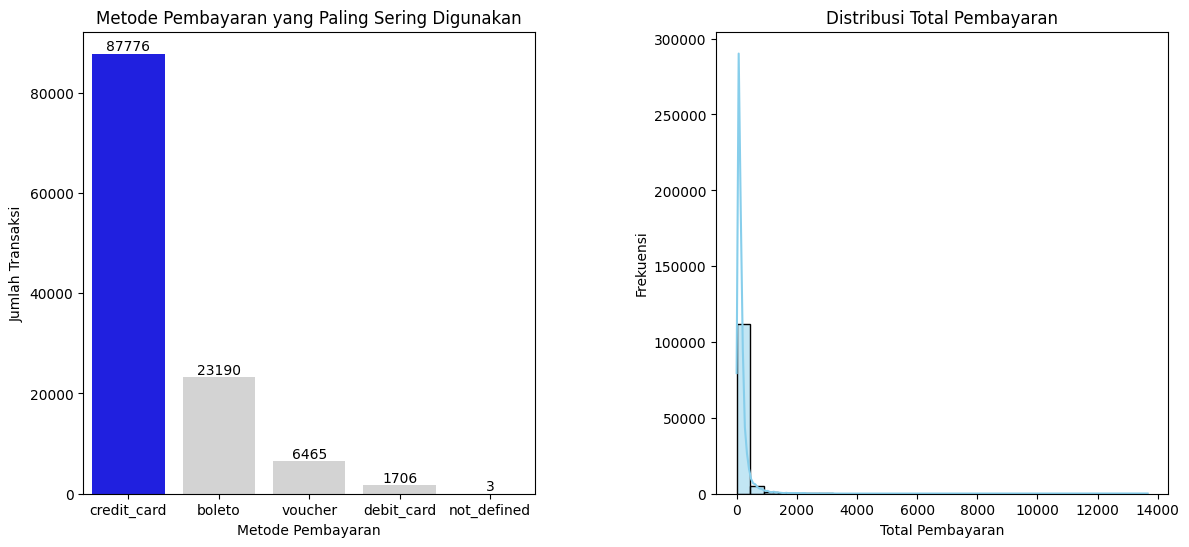

In [ ]:
# Hitung jumlah transaksi dan total pembayaran per metode pembayaran
payment_counts = df['payment_type'].value_counts()
total_payment_value_per_type = df.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

# Buat subplot dengan ukuran yang lebih wajar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flatten()

most_used_payment = payment_counts.idxmax()
colors = ['blue' if payment == most_used_payment else 'lightgray' for payment in payment_counts.index]

# Bar Chart untuk Metode Pembayaran
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette=colors, ax=axes[0])
axes[0].set_xlabel("Metode Pembayaran")
axes[0].set_ylabel("Jumlah Transaksi")
axes[0].set_title("Metode Pembayaran yang Paling Sering Digunakan")

# Tambahkan label nilai di atas batang
for i, v in enumerate(payment_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

# Histogram Distribusi Total Pembayaran
sns.histplot(df['payment_value'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel("Total Pembayaran")
axes[1].set_ylabel("Frekuensi")
axes[1].set_title("Distribusi Total Pembayaran")

# Tampilkan plot
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

In [ ]:
total_payment_value_per_type

,payment_value
payment_type,
credit_card,15775450.54
boleto,4110920.74
voucher,435917.84
debit_card,257374.89
not_defined,0.00


**Insight**
- Terlihat metode pembayaran yang sering digunakan adalah credit card dengan jumlah transaksi sebanyak 87776.
- Distribusi total pembayaran untuk credit card adalah 15775450.54

### Pertanyaan 3: Kategori produk mana yang memiliki harga rata-rata tertinggi dan terendah serta berkontribusi paling besar terhadap pendapatan?

<ipython-input-77-137ac821548c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='price', x='product_category_name_english', data=top_expensive, ax=axes[0],
<ipython-input-77-137ac821548c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='price', x='product_category_name_english', data=top_cheap, ax=axes[1],
<ipython-input-77-137ac821548c>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='price', x='product_category_name_english', data=top_revenue, ax=axes[2],


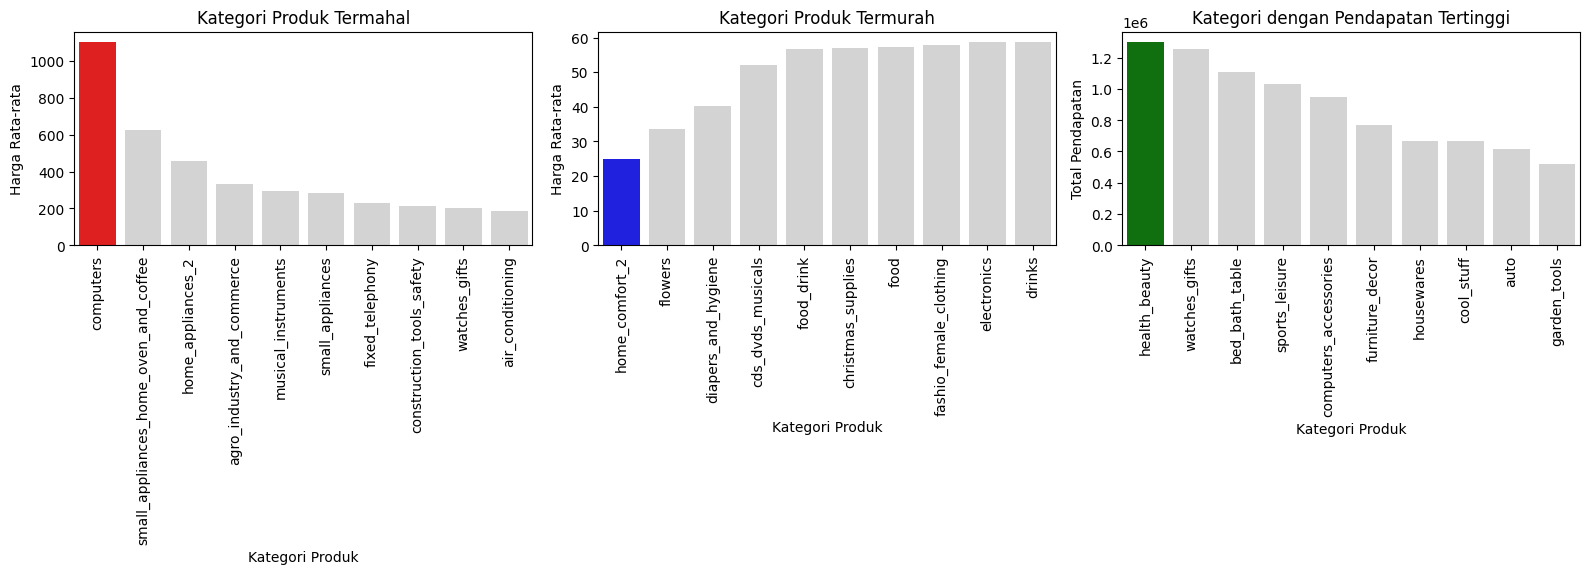

In [ ]:
# Agregasi harga rata-rata per kategori
df_category_price = df.groupby('product_category_name_english')['price'].mean().reset_index()
df_category_price = df_category_price.sort_values(by='price', ascending=False)

# kategori dengan harga rata-rata tertinggi & terendah
top_expensive = df_category_price.nlargest(10, 'price')
top_cheap = df_category_price.nsmallest(10, 'price')

# Agregasi total pendapatan per kategori
df_category_revenue = df.groupby('product_category_name_english')['price'].sum().reset_index()
df_category_revenue = df_category_revenue.sort_values(by='price', ascending=False)

# kategori dengan pendapatan tertinggi
top_revenue = df_category_revenue.head(10)


def highlight_color(data, main_color):
    colors = [main_color if i == 0 else 'lightgray' for i in range(len(data))]
    return colors

# Setup plotting dengan 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Bar chart harga rata-rata tertinggi (Merah untuk tertinggi)
sns.barplot(y='price', x='product_category_name_english', data=top_expensive, ax=axes[0],
            palette=highlight_color(top_expensive, 'red'))
axes[0].set_title("Kategori Produk Termahal")
axes[0].set_xlabel("Kategori Produk")
axes[0].set_ylabel("Harga Rata-rata")
axes[0].tick_params(axis='x', rotation=90)

# Bar chart harga rata-rata terendah (Biru untuk terendah)
sns.barplot(y='price', x='product_category_name_english', data=top_cheap, ax=axes[1],
            palette=highlight_color(top_cheap, 'blue'))
axes[1].set_title("Kategori Produk Termurah")
axes[1].set_xlabel("Kategori Produk")
axes[1].set_ylabel("Harga Rata-rata")
axes[1].tick_params(axis='x', rotation=90)

# Bar chart pendapatan tertinggi (Hijau untuk tertinggi)
sns.barplot(y='price', x='product_category_name_english', data=top_revenue, ax=axes[2],
            palette=highlight_color(top_revenue, 'green'))
axes[2].set_title("Kategori dengan Pendapatan Tertinggi")
axes[2].set_xlabel("Kategori Produk")
axes[2].set_ylabel("Total Pendapatan")
axes[2].tick_params(axis='x', rotation=90)

# Atur tata letak
plt.tight_layout()
plt.show()

**Insight**
- Computers masuk ke dalam kategori produk paling mahal dan home comfort 2 masuk kedalam kategori produk paling murah.
- Kategori yang memiliki tingkat pendapatan tertinggi adalah health beauty

### Pertamyaan 4: Bagaimana distribusi dan rata-rata skor review pelanggan? Apakah kategori produk tertentu cenderung memiliki skor review tinggi atau rendah?

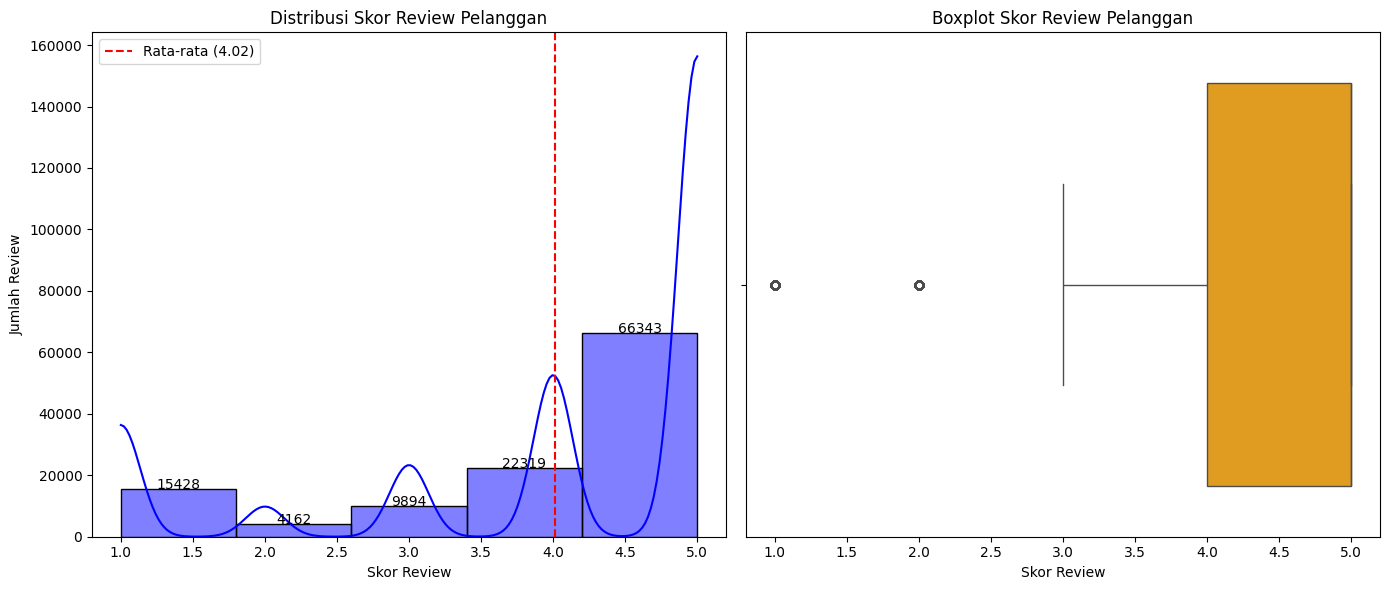

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flatten()

sns.histplot(df['review_score'], bins=5, kde=True, color="blue", ax=axes[0])
axes[0].set_xlabel("Skor Review")
axes[0].set_ylabel("Jumlah Review")
axes[0].set_title("Distribusi Skor Review Pelanggan")
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:
        axes[0].text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), ha="center")
avg_review_score = df['review_score'].mean()
axes[0].axvline(avg_review_score, color='red', linestyle='--', label=f'Rata-rata ({avg_review_score:.2f})')
axes[0].legend()

sns.boxplot(x=df['review_score'], color="orange", ax=axes[1])
axes[1].set_xlabel("Skor Review")
axes[1].set_title("Boxplot Skor Review Pelanggan")
plt.tight_layout()
plt.show()


<ipython-input-81-6e9e25790d1e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_mean.index, y=review_mean.values, palette=highlight_review_colors(review_mean), ax=axes[1])


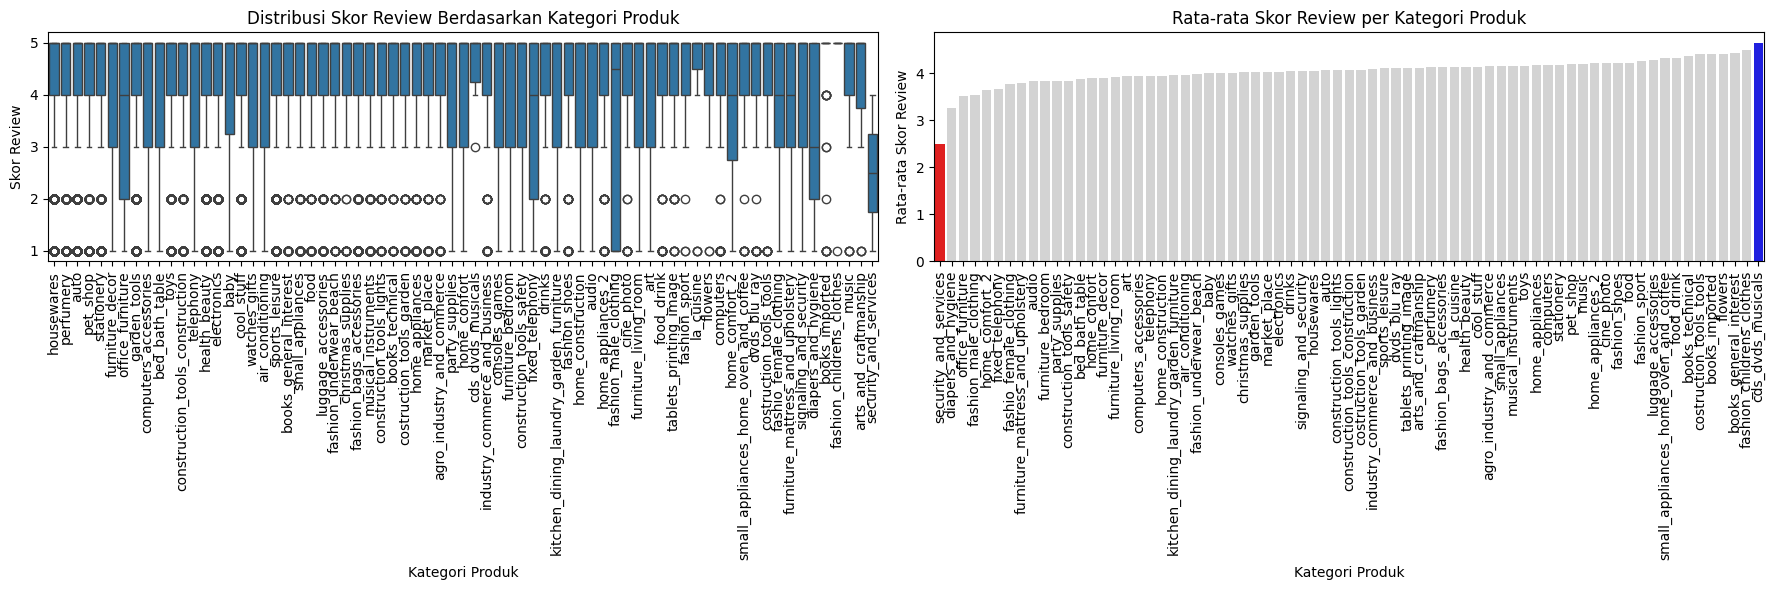

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
def highlight_review_colors(data):
    colors = ['lightgray'] * len(data)
    colors[0] = 'red'
    colors[-1] = 'blue'
    return colors

# Boxplot untuk melihat distribusi skor review per kategori produk
sns.boxplot(x='product_category_name_english', y='review_score', data=df, ax=axes[0])
axes[0].set_xlabel("Kategori Produk")
axes[0].set_ylabel("Skor Review")
axes[0].set_title("Distribusi Skor Review Berdasarkan Kategori Produk")
axes[0].tick_params(axis='x', rotation=90)

# Bar Chart rata-rata skor review per kategori produk
review_mean = df.groupby('product_category_name_english')['review_score'].mean().sort_values()
sns.barplot(x=review_mean.index, y=review_mean.values, palette=highlight_review_colors(review_mean), ax=axes[1])
axes[1].set_xlabel("Kategori Produk")
axes[1].set_ylabel("Rata-rata Skor Review")
axes[1].set_title("Rata-rata Skor Review per Kategori Produk")
axes[1].tick_params(axis='x', rotation=90)

# Tampilkan plot
plt.tight_layout()
plt.show()


**Insight**
- Distribusi rata-rata review score keseluruhan produk adalah 4.02 dengan kontibusi produk yang memilik review score paling tinggi diantara rentang 4-5 sebanyak 66343
- Ya, rata-rata review score setiap kategori produk memiliki skor yang cukup tinggi dengan rentang (3 > skor < 5), dengan hanya satu kategori produk yang memiliki rata-rata review score >3 yaitu kategori produk security and services

### Pertanyaan 5: Bagaimana status pengiriman pesanan? Berapa persen pesanan yang mengalami pembatalan?



<ipython-input-82-40c53f7e1372>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=delivery_status_counts.index, y=delivery_status_counts.values, palette="Blues_r")


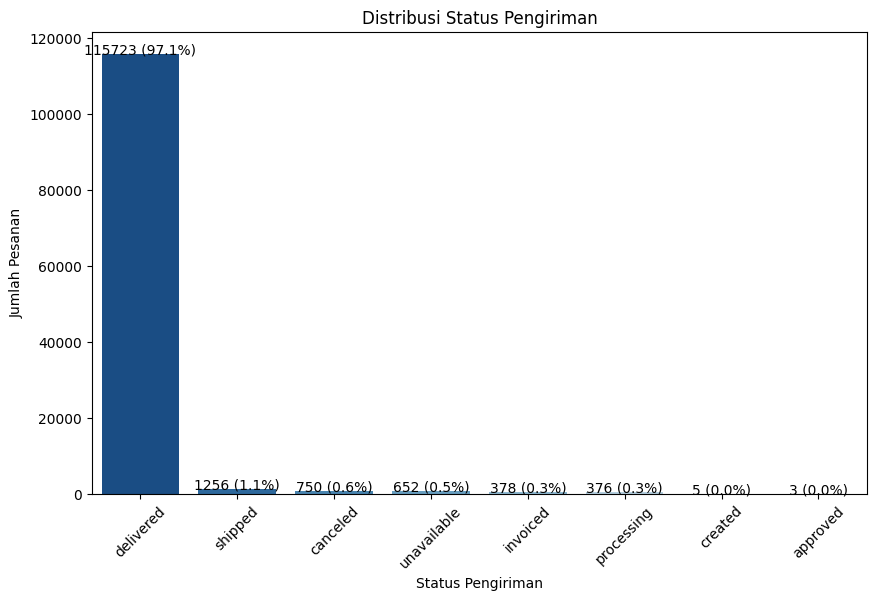

In [82]:
delivery_status_counts = df['order_status'].value_counts()
total_orders = delivery_status_counts.sum()

# Hitung persentase
delivery_status_percent = (delivery_status_counts / total_orders) * 100

# Plot Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=delivery_status_counts.index, y=delivery_status_counts.values, palette="Blues_r")

plt.xlabel("Status Pengiriman")
plt.ylabel("Jumlah Pesanan")
plt.title("Distribusi Status Pengiriman")

for i, (count, percent) in enumerate(zip(delivery_status_counts.values, delivery_status_percent)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.show()

**Insight**
- Terlihat status pengiriman produk delivered sebesar 97.1%, maka dapat diartikan produk telah diterima baik oleh pelanggan atau pemiliknya.
- Persentase untuk pembatalan pengiriman produk sangat rendah yaitu 0.6% atau sebanyak 750 produk yang mengalami pembatalan pengiriman.

### Pertanyaan 6: Apakah terdapat pola musiman atau tren tertentu dalam jumlah pesanan bulanan, dan bagaimana kinerja bulan-bulan tertentu dibandingkan dengan rata-rata?

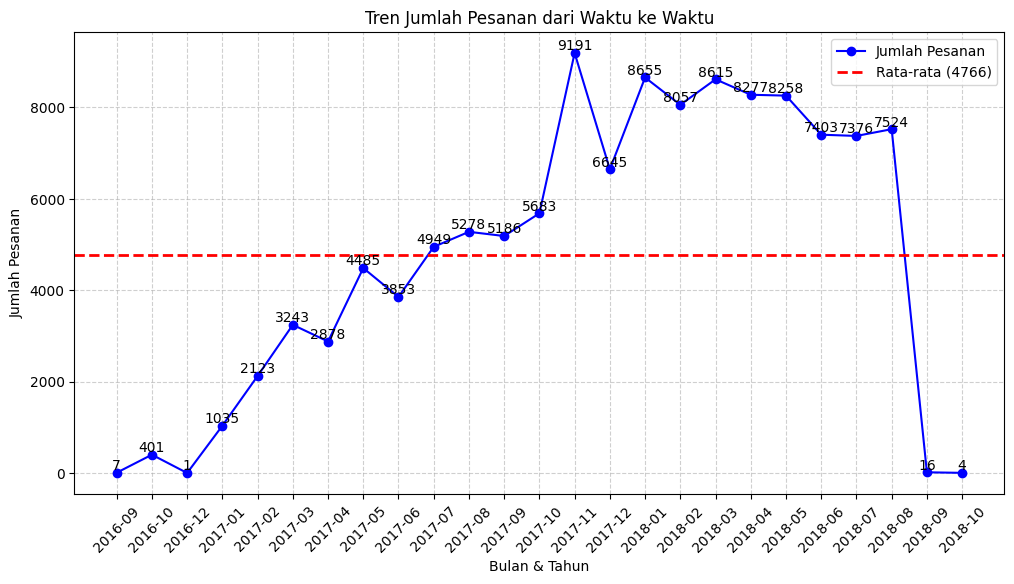

In [83]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah pesanan per bulan
monthly_orders = df.groupby('month_year').size()

# Hitung rata-rata jumlah pesanan
average_orders = monthly_orders.mean()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(str), monthly_orders, marker='o', color='b', label="Jumlah Pesanan")
plt.axhline(y=average_orders, color='r', linestyle='--', linewidth=2, label=f'Rata-rata ({average_orders:.0f})')
for i, value in enumerate(monthly_orders):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
plt.xlabel("Bulan & Tahun")
plt.ylabel("Jumlah Pesanan")
plt.title("Tren Jumlah Pesanan dari Waktu ke Waktu")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Insight:**
- Pola musiman atau tren tertentu pastinya ada pada kasus ini, Dari grafik terlihat bahwa jumlah pesanan meningkat secara bertahap dari September 2016 hingga mencapai puncaknya pada November 2017, lalu stabil di atas rata-rata hingga pertengahan 2018.
- Ada indikasi pola musiman, di mana bulan Desember dalam dua tahun terakhir menunjukkan penurunan jumlah pesanan (2016-12 dan 2017-12). Hal ini bisa disebabkan oleh faktor musiman seperti liburan atau perubahan tren belanja pelanggan.
- Setelah kenaikan tertinggi di akhir 2017, jumlah pesanan tetap tinggi tetapi mulai menunjukkan sedikit penurunan setelah pertengahan 2018.
- Dari September 2016 hingga Juni 2017, jumlah pesanan sebagian besar berada di bawah rata-rata. Ini menunjukkan bahwa bisnis masih dalam tahap pertumbuhan pada periode tersebut. Mulai dari Juli 2017 hingga Agustus 2018, jumlah pesanan cenderung berada di atas rata-rata, yang menunjukkan periode ekspansi atau peningkatan pesanan yang signifikan.
- Lonjakan pesanan yang sangat tinggi pada November 2017 tampaknya memainkan peran besar dalam menaikkan rata-rata keseluruhan.
- Terdapat Penurunan drastis di bulan September dan Oktober 2018 hal ini perlu dicermati, apakah disebabkan oleh faktor musiman, perubahan strategi bisnis, atau faktor lain.

## Analisis Lanjutan dengan RFM

### Pertanyaan tambahan: Seberapa sering pelanggan melakukan transaksi, dan apakah ada pola pelanggan yang jarang kembali bertransaksi dalam jangka waktu tertentu?

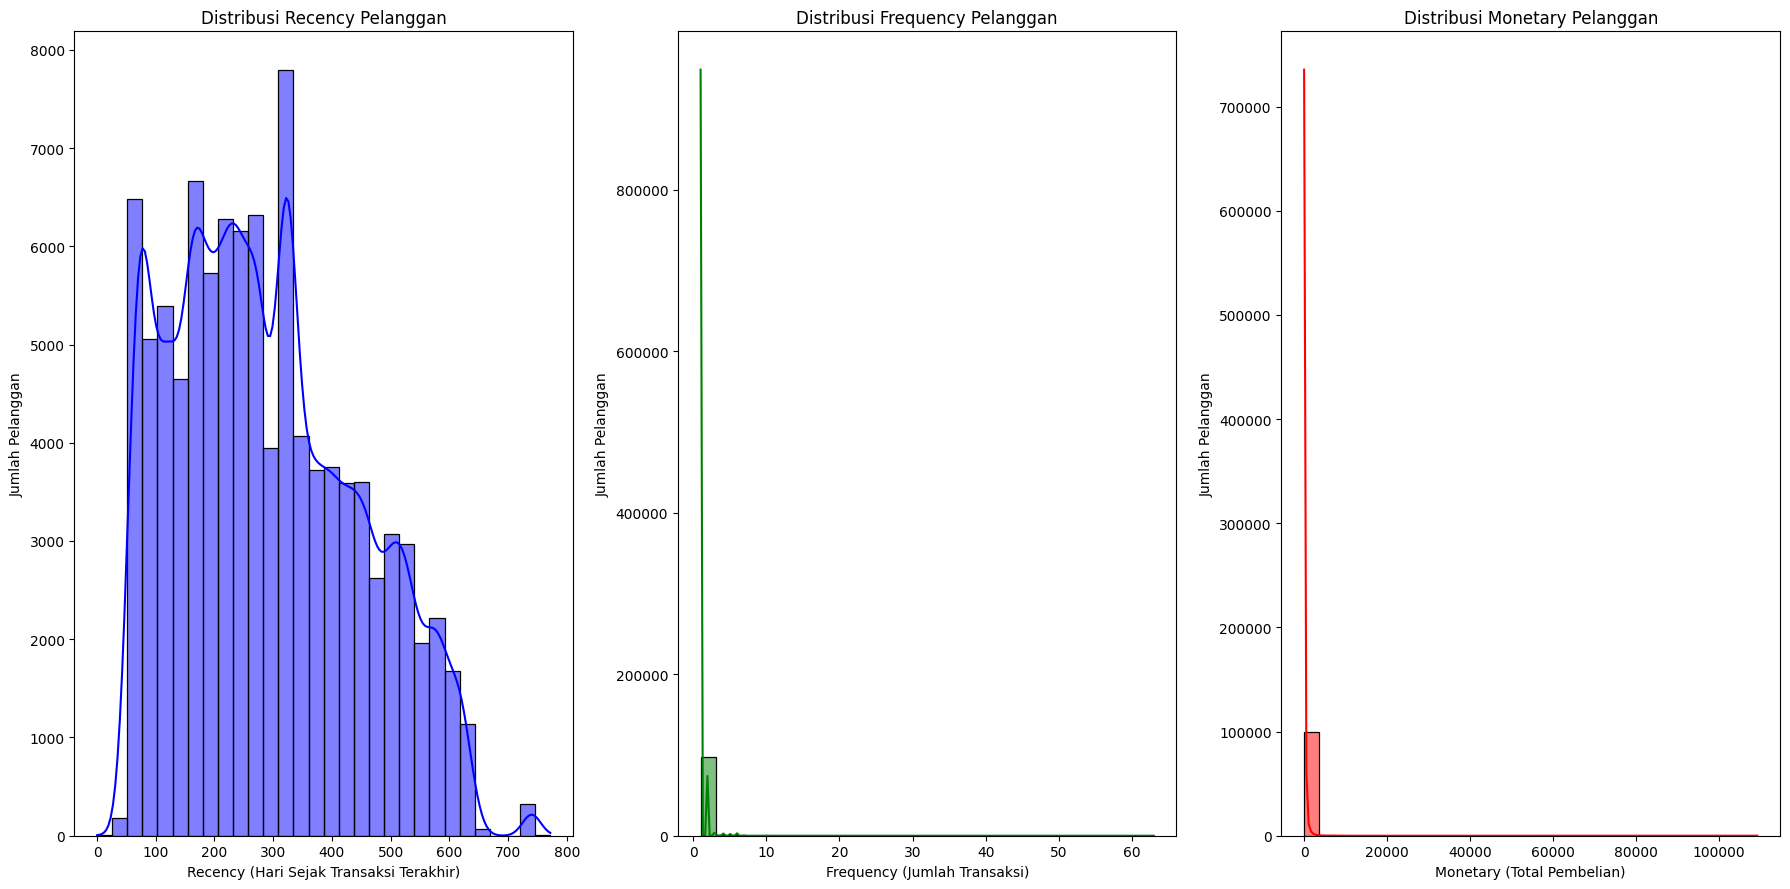

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(18, 9))

# Plot Distribusi Recency
sns.histplot(rfm_df['Recency'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_xlabel('Recency (Hari Sejak Transaksi Terakhir)')
axes[0].set_ylabel('Jumlah Pelanggan')
axes[0].set_title('Distribusi Recency Pelanggan')

# Plot Distribusi Frequency
sns.histplot(rfm_df['Frequency'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_xlabel('Frequency (Jumlah Transaksi)')
axes[1].set_ylabel('Jumlah Pelanggan')
axes[1].set_title('Distribusi Frequency Pelanggan')

# Plot Distribusi Monetery
sns.histplot(rfm_df['Monetary'], bins=30, kde=True, color='red', ax=axes[2])
axes[2].set_xlabel('Monetary (Total Pembelian)')
axes[2].set_ylabel('Jumlah Pelanggan')
axes[2].set_title('Distribusi Monetary Pelanggan')

plt.tight_layout()
plt.show()

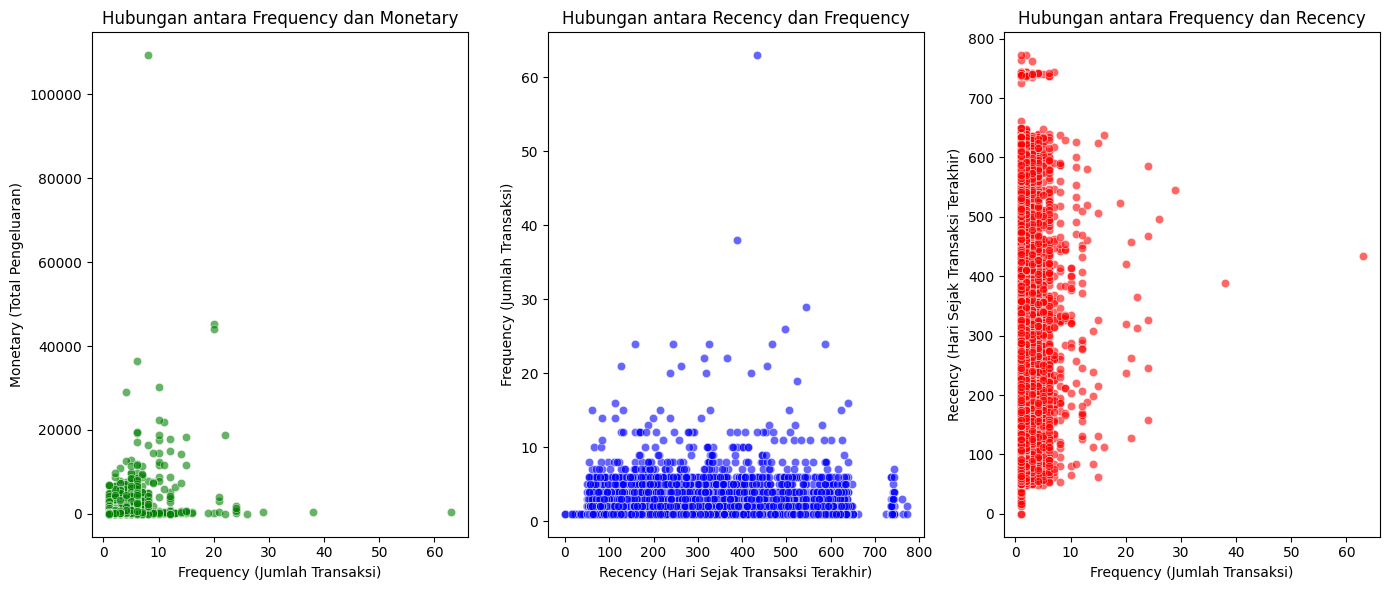

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
axes = axes.flatten()


# Scatter Plot antara Frequency dan Monetary
sns.scatterplot(x=rfm_df['Frequency'], y=rfm_df['Monetary'], color='green', alpha=0.6, ax=axes[0])
axes[0].set_xlabel('Frequency (Jumlah Transaksi)')
axes[0].set_ylabel('Monetary (Total Pengeluaran)')
axes[0].set_title('Hubungan antara Frequency dan Monetary')

# Recency vs Frequency Plot
sns.scatterplot(x=rfm_df['Recency'], y=rfm_df['Frequency'], color='blue', alpha=0.6, ax=axes[1])
axes[1].set_xlabel('Recency (Hari Sejak Transaksi Terakhir)')
axes[1].set_ylabel('Frequency (Jumlah Transaksi)')
axes[1].set_title('Hubungan antara Recency dan Frequency')

# Frequency vs Recency Plot
sns.scatterplot(x=rfm_df['Frequency'], y=rfm_df['Recency'], color='red', alpha=0.6, ax=axes[2])
axes[2].set_xlabel('Frequency (Jumlah Transaksi)')
axes[2].set_ylabel('Recency (Hari Sejak Transaksi Terakhir)')
axes[2].set_title('Hubungan antara Frequency dan Recency')

plt.tight_layout()
plt.show()

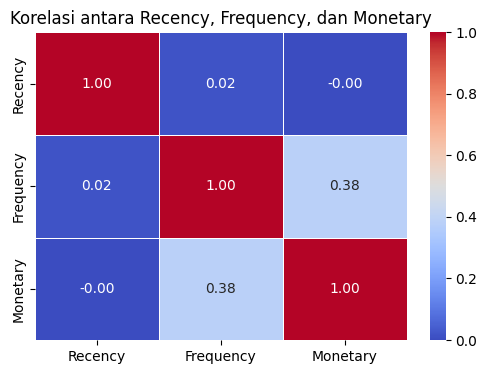

In [89]:
# Hitung korelasi antar variabel RFM
rfm_corr = rfm_df[['Recency', 'Frequency', 'Monetary']].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(rfm_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara Recency, Frequency, dan Monetary")
plt.show()

**Insight**
- Recency vs Frequency (0.02): Hampir tidak ada hubungan; pelanggan yang baru bertransaksi tidak selalu lebih sering bertransaksi.
- Frequency vs Monetary (0.38): Korelasi positif sedang; semakin sering pelanggan bertransaksi, semakin tinggi total pengeluarannya.
- Recency vs Monetary (-0.00): Tidak ada hubungan signifikan; waktu sejak transaksi terakhir tidak memengaruhi total pengeluaran.



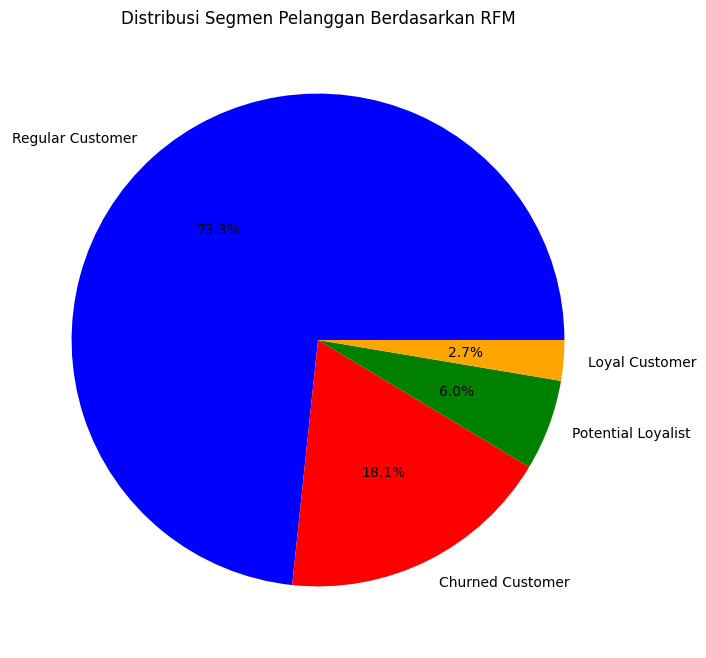

In [86]:
# Persentase klasifikasi segment
segment_counts = rfm_df['Customer_Segment'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=['blue', 'red', 'green', 'orange', 'purple'])
plt.title("Distribusi Segmen Pelanggan Berdasarkan RFM")
plt.show()

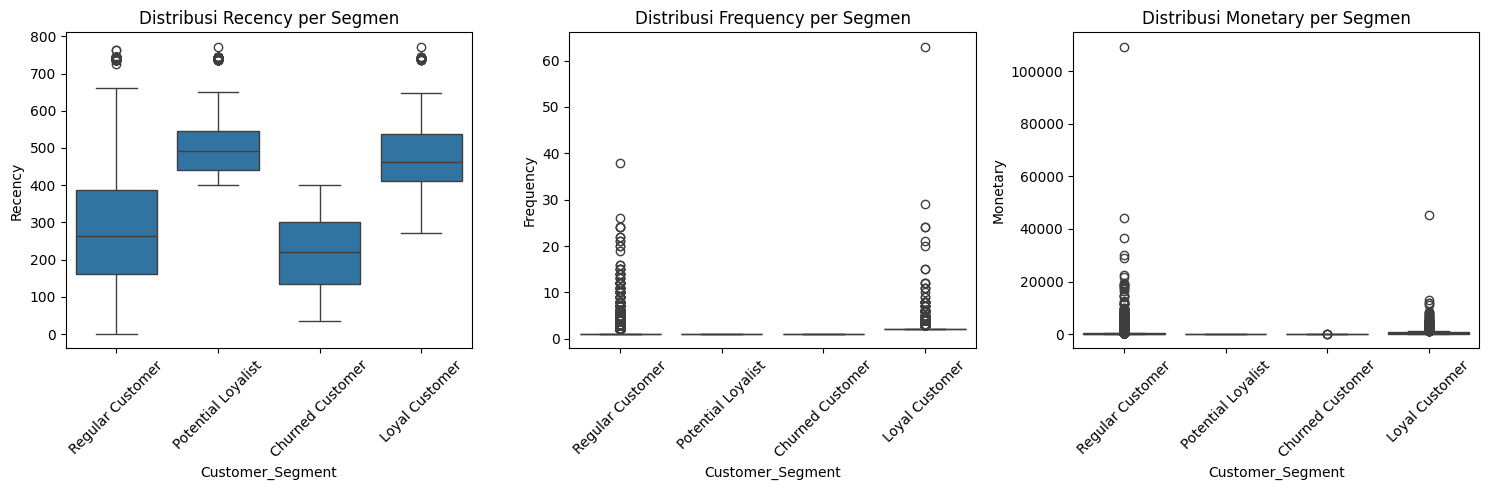

In [87]:
plt.figure(figsize=(15, 5))

# Recency
plt.subplot(1, 3, 1)
sns.boxplot(x='Customer_Segment', y='Recency', data=rfm_df)
plt.xticks(rotation=45)
plt.title('Distribusi Recency per Segmen')

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x='Customer_Segment', y='Frequency', data=rfm_df)
plt.xticks(rotation=45)
plt.title('Distribusi Frequency per Segmen')

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x='Customer_Segment', y='Monetary', data=rfm_df)
plt.xticks(rotation=45)
plt.title('Distribusi Monetary per Segmen')

plt.tight_layout()
plt.show()

**Insight**
- Mayoritas pelanggan adalah Regular Customer (73.3%), sementara Churned Customer cukup signifikan (18.1%). Potential Loyalist (6.0%) dan Loyal Customer (2.7%) memiliki proporsi kecil
- Recency: Loyal Customer dan Potential Loyalist memiliki nilai recency lebih tinggi, menunjukkan mereka baru saja bertransaksi, sedangkan Churned Customer memiliki recency lebih rendah.
- Frequency: Sebagian besar pelanggan jarang bertransaksi, tetapi Loyal Customer memiliki beberapa pelanggan dengan frekuensi sangat tinggi.
- Monetary: Mayoritas pelanggan memiliki pengeluaran rendah, namun ada beberapa outlier dengan pengeluaran sangat tinggi, terutama di segmen Regular dan Loyal Customer.

<ipython-input-97-f582ba64340b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_per_segment.index, y=revenue_per_segment.values, palette='viridis')


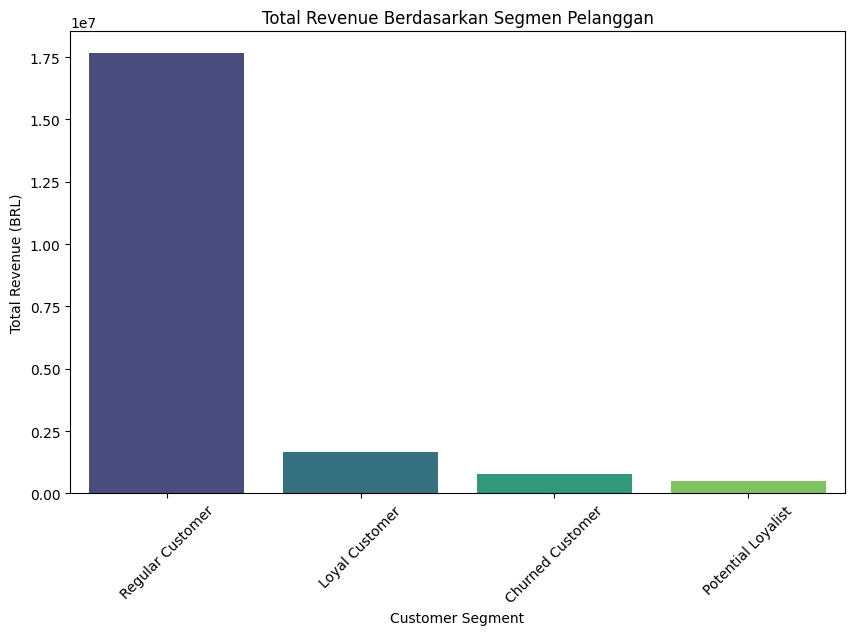

In [ ]:
# Agregasi pendapatan per segmen
revenue_per_segment = rfm_df.groupby('Customer_Segment')['Monetary'].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_per_segment.index, y=revenue_per_segment.values, palette='viridis')
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue (BRL)")
plt.title("Total Revenue Berdasarkan Segmen Pelanggan")

plt.xticks(rotation=45)
plt.show()


**Insight**
- Regular Customer mendominasi pendapatan, sementara segmen lain berkontribusi jauh lebih kecil.

## Conclusion

- Conclution pertanyaan 1: Distribusi penyebaran pelanggan paling banyak terdapat di negara bagian SP dan distribusi penyebaran pelanggan paling sedikit terdapat pada negara bagian RR.

- Conclution pertanyaan 2: Metode pembayaran paling sering digunakan adalah credit card dengan total biaya pembayaran sekitar 15775450.54 untuk 87776 transaksi.

- Conclution pertanyaan 3: Computers merupakan Kategori produk yang memiliki harga rata-rata tertinggi dan home comfort 2 merupakan kategori dengan rata-rata terendah serta kategori yang berkontribusi paling besar terhadap pendapatan adalah healty beauty.

- Conlution pertanyaan 4: Distribusi rata-rata skor review  adalah 4.02/5. dan untuk kategori yang memiliki skor review paling tinggi adalah cds dvds musicals sedangkan untuk kategori yang memiliki skor review paling rendah adalah security and services.

- Conlution pertanyaan 5: Status pengiriman pesanan mendapatkan 97.1% untk status delivered, sedangkan untuk pengiriman pesanan yang dibatalkan ada sekitar 0.6%.

- Conlution pertanyaan 6: Analisis tren pesanan mengungkap pola musiman dengan kenaikan signifikan dari Juli 2017 hingga Agustus 2018, didorong oleh lonjakan pesanan pada November 2017 yang meningkatkan rata-rata menjadi 4.766. Namun, penurunan konsisten setiap Desember tahun 2016-2017 menunjukkan adanya faktor musiman yang memengaruhi permintaan.

- Conclution Pertanyaan tambahan: Sebagian besar pelanggan jarang bertransaksi ulang. Churned Customer menunjukkan pola jarang kembali, sementara Loyal Customer lebih sering bertransaksi meski jumlahnya sedikit. Dengan hal ini maka tidak ada hubungan yang kuat antara waktu transaksi terakhir dan frekuensi pembelian.


In [96]:
# Export file csv
df_all = df.merge(rfm_df, on='customer_id', how='left')

df_all.to_csv('all_data.csv', index=False)
print("File berhasil diekspor sebagai 'all_data.csv'")


df_all.info()

File berhasil diekspor sebagai 'all_data.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              119143 non-null  datetime64[ns]
 5   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 6   order_delivered_customer_date  119143 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   customer_unique_id             119143 non-null  object        
 9   customer_zip_code_prefix       119143 non-null  int64         
 10  customer_city         